# NOTE:
This document was created for the purpose of simple data exploration prior to the creation of a project proposal. As such, it's contents herein are not particularly relevant to the given task

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_json_to_df(datapass):
    data = [] 
    with open(datapass) as data_file: 
        for f in data_file:
            data.append(json.loads(f))
    df = pd.DataFrame(data)
    return df

In [4]:
business = load_json_to_df('dataset/business.json')

In [3]:
user = load_json_to_df('dataset/user.json')

In [4]:
checkin = load_json_to_df('dataset/checkin.json')

In [3]:
tip = load_json_to_df('dataset/tip.json')

### What type of companies are on Yelp?

In [10]:
print(list(business))

['address', 'attributes', 'business_id', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood', 'postal_code', 'review_count', 'stars', 'state']


In [24]:
states = business['state'].value_counts()
states[states > 1000]

AZ     47376
NV     30571
ON     26520
NC     11299
OH     10930
PA      8916
QC      7273
WI      4190
EDH     3561
BW      3071
IL      1667
Name: state, dtype: int64

EDH indicates Edinburgh, BW indicates Baden-Wurttemberg. For NLP problems, we will probably want to filter out all non-English reviews.

In [34]:
business.shape

(156639, 15)

In [40]:
categories = [item for sublist in business['categories'].ravel().flatten() for item in sublist]
unique_cat = set(categories)
len(unique_cat)

1240

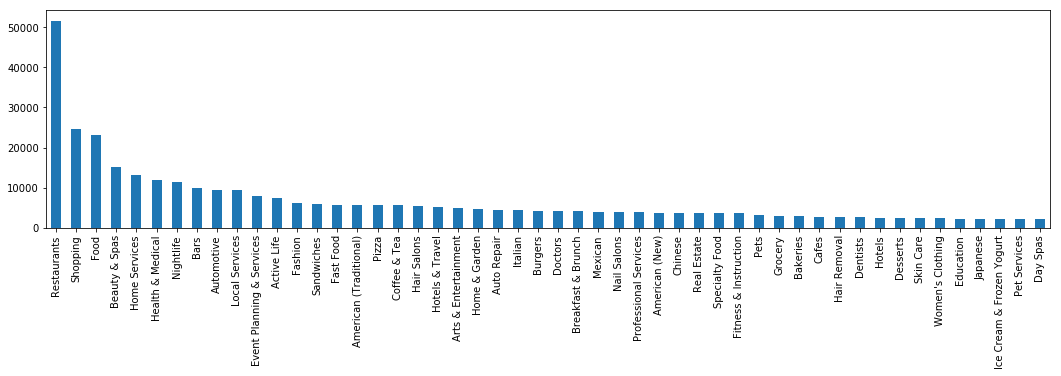

In [59]:
fig = plt.figure(figsize=(18,4))
pd.Series(categories).value_counts()[:50].plot(kind='bar');

In [63]:
x = business['review_count'].values
y = business['stars'].values

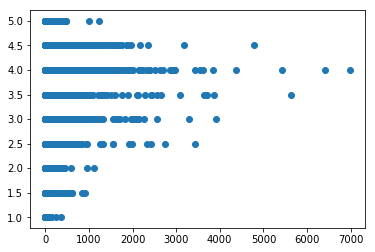

In [71]:
plt.scatter(x,y);

In [74]:
np.corrcoef(x,y)

array([[ 1.        ,  0.02561587],
       [ 0.02561587,  1.        ]])

### How do people use "tips"?

In [12]:
list(tip)

['business_id', 'date', 'likes', 'text', 'user_id']

In [10]:
tip['likes'].value_counts().sort_index()

0     1013423
1       13950
2        1167
3         181
4          48
5          18
6           7
7           3
8           1
9           1
11          1
12          1
15          1
Name: likes, dtype: int64

In [4]:
from langdetect import detect

In [43]:
langs = ['']*1000
for i in range(1000):
    try:
        langs[i] = detect(tip['text'][i])
    except:
        langs[i] = 'NA'

In [44]:
langs = np.array(langs)
english = (langs == 'en')
other = (langs != 'en')

In [45]:
pd.Series(langs).value_counts()[:5]

en    829
de     27
af     14
it     13
tl     12
dtype: int64

In [46]:
print('{}% of first 1000 tips are in English, according to langdetect. However, ...'.format(english.sum()/10))

82.9% of first 1000 tips are in English, according to langdetect. However, ...


In [47]:
other_idx = np.arange(len(other))[(other == True)]
for idx in other_idx[:20]:
    print('Detected:', langs[idx], 'Text:', tip['text'][idx])

Detected: so Text: Always sooooo good!!
Detected: da Text: Ask for free refills!
Detected: fi Text: Noisy
Detected: af Text: Greek Easter egg dye!
Detected: sv Text: Lunch menu ends at 3 p. m.
Detected: ca Text: Salted caramel macaroons! Espresso macaroons!
Detected: tl Text: Blawnox, not Aspinwall
Detected: da Text: Knorks!
Detected: pl Text: Very nice!
Detected: no Text: Canned soda $1.75. I'll skip it.
Detected: it Text: Still delicious!
Detected: it Text: Favorite place to go!
Detected: NA Text: ***********
Detected: ro Text: Yea.   No salt!
Detected: pl Text: Flower power!
Detected: it Text: Awesome pizza!
Detected: de Text: Packing lunches.  Best deli ever.
Detected: pt Text: Avocado Smoothie. Fabulous!
Detected: es Text: Arsenal cider!
Detected: it Text: Taco pizza.  The best!


Language keys:  
so: Somali  
da: Danish
fi: Finnish  
af: Afrikaans  
sv: Swedish

In [48]:
a = [432, 715]
for idx in a:
    print('Detected:', langs[idx], 'Text:', tip['text'][idx])

Detected: de Text: Yummy Oktoberfest menu. I'm getting Schnitzel.
Detected: fr Text: Une fois encore, mes amis.


langdetect package is not useless, but too sensitive to specific nouns, spelling mistakes and prone to random errors. 

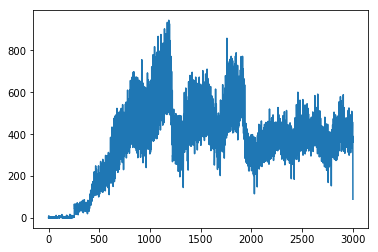

In [56]:
dates = tip['date'].value_counts().sort_index()
plt.plot(np.arange(len(dates)), dates);

In [67]:
popular = np.arange(tip.shape[0])[tip['likes'] >= 3]
lengths = []
for n in popular:
    lengths.append(len(tip['text'][n]))
np.mean(lengths)

154.39312977099237